In [0]:
pip install python-mnist Augmentor sklearn

In [0]:
from mnist import MNIST

mndata = MNIST("/content/")

X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()


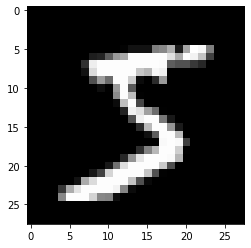

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 253, 90, 0, 

In [3]:
import matplotlib.pyplot as plt
import numpy as np

id = 0

image = np.array(X_train[id], dtype="float")
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap="gray")
plt.show()

print(X_train[id])
print(y_train[id])


In [0]:
from keras.utils.np_utils import to_categorical
import numpy as np

# Data conversion
X_train= np.asarray(X_train)
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_train = X_train.astype(np.uint8)
y_train = np.asarray(y_train)

X_test = np.reshape(np.asarray(X_test), (len(X_test), 28, 28, 1))
y_test = np.asarray(y_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [0]:
# Hyperparameters
batch_size = 32
validation_split = 0.10
learning_rate = 0.0001
epochs = 100
p = 0.25  # Probability of applying each transformation in the pipeline


In [0]:
# Data Augmentation
from sklearn.model_selection import train_test_split
import Augmentor

# Split data training into sub train and validation
partial_X_train, X_validation, partial_y_train, y_validation = train_test_split(
    X_train, 
    y_train, 
    test_size=validation_split, 
    shuffle=True
)


# Scale validation and test set
X_test = X_test / 255.0
X_validation = X_validation / 255.0


# Create two augmentation pipeline: one for digit 1 and 7 and one for other digits
# Find indexes of digit 1 and 7
index_one_seven = np.concatenate(
    (
        np.where((partial_y_train == (0, 1, 0, 0, 0, 0, 0, 0, 0, 0)).all(axis=1)),
        np.where((partial_y_train == (0, 0, 0, 0, 0, 0, 0, 1, 0, 0)).all(axis=1)),
    ),
    axis=1,
)
index_one_seven = np.reshape(index_one_seven, (index_one_seven.shape[1]))

#Split partial training data into two sets based on their classes for each pipelines
partial_X_train_one_seven = partial_X_train[index_one_seven]
partial_y_train_one_seven = partial_y_train[index_one_seven]

partial_X_train_other = np.delete(partial_X_train, index_one_seven, axis=0)
partial_y_train_other = np.delete(partial_y_train, index_one_seven, axis=0)


# Create pipelines and their augmentations
one_seven_generator = Augmentor.Pipeline()

# Rotating
one_seven_generator.rotate(
    probability=p, 
    max_left_rotation=7.5, 
    max_right_rotation=7.5)

# Sheering
one_seven_generator.shear(
    probability=p, 
    max_shear_left=7.5, 
    max_shear_right=7.5)

# Elastic distortion
one_seven_generator.random_distortion(
    probability=p, 
    grid_width=3, 
    grid_height=3, 
    magnitude=7)  # Elastic distortion

other_generator = Augmentor.Pipeline()

# Rotating
other_generator.rotate(
    probability=p, 
    max_left_rotation=15.0,
     max_right_rotation=15.0)

# Sheering
other_generator.shear(
    probability=p, 
    max_shear_left=15.0, 
    max_shear_right=15.0)  

# Elastic distortion
other_generator.random_distortion(
    probability=p, 
    grid_width=3, 
    grid_height=3, 
    magnitude=7)


# Merge two pipeline into one
def MergeGenerator(gen1, gen2):
    while True:
        rand = np.random.random()  # Assume classes are evenly distributed, chance are seeing derivative of 1 and 7 is 20%
        if rand > 0.8:
            yield next(gen1)
        else:
            yield next(gen2)

gen1 = one_seven_generator.keras_generator_from_array(
    partial_X_train_one_seven, 
    partial_y_train_one_seven, 
    batch_size
)
gen2 = other_generator.keras_generator_from_array(
    partial_X_train_other, 
    partial_y_train_other, 
    batch_size
)
training_data_generator = MergeGenerator(gen1, gen2)


In [7]:
from keras import models, layers, optimizers, callbacks

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(28, 28, 1)))
model.add(layers.Flatten())

model.add(layers.Dense(2500, activation="relu"))
model.add(layers.Dense(2000, activation="relu"))
model.add(layers.Dense(1500, activation="relu"))
model.add(layers.Dense(1000, activation="relu"))
model.add(layers.Dense(500, activation="relu"))

model.add(layers.Dense(10, activation="softmax"))

model.compile(
    optimizer=optimizers.Adam(lr=learning_rate),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit_generator(
    training_data_generator,
    validation_data=(X_validation, y_validation),
    steps_per_epoch=np.ceil(len(X_train) * (1 - validation_split) / batch_size),
    epochs=epochs,
    callbacks=[
        callbacks.EarlyStopping(
            monitor="val_loss", patience=7, restore_best_weights=True
        )
    ],
)

result = model.evaluate(X_test, y_test)

print("Testing loss = ", result[0])
print("Testing accuracy = ", result[1])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1688/1688 [==============================] - 32s 19ms/step - loss: 0.5672 - acc: 0.8195 - val_loss: 0.1496 - val_acc: 0.9560
Epoch 2/100
1688/1688 [==============================] - 31s 18ms/step - loss: 0.2933 - acc: 0.9045 - val_loss: 0.1209 - val_acc: 0.9635
Epoch 3/100
1688/1688 [==============================] - 31s 18ms/step - loss: 0.2458 - acc: 0.9202 - val_loss: 0.1045 - val_acc: 0.9697
Epoch 4/100
1688/1688 [==============================] - 31s 18ms/step - loss: 0.2051 - acc: 0.9347 - val_loss: 0.0784 - val_acc: 0.9772
Epoch 5/100
1688/1688 [==============================] - 31s 18ms/step - loss: 0.1899 - acc: 0.9383 - val_loss: 0.0952 - val_acc: 0.9725
Epoch 6/100
1688/1688 [==============================] - 31s 18ms/step - loss: 0.1773 - acc: 0.9415 - val_loss: 0.0899 - val_acc: 0.9772
Epoch 7/100
1688/1688 [==============================] - 31s 18ms/step 